In [1]:
# importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('moviedata.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
# exploring genres column
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [5]:
# check for duplicated rows
df.duplicated().sum()


np.int64(0)

In [6]:
# exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [7]:
# Data Cleaning


In [8]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
# confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [9]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping Overview, Original_Languege
and Poster-Url


In [11]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [12]:
# dropping columns and confirming changes
df.drop(cols, axis = 1, inplace = True)
df.columns


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

categorizing Vote_Average column
We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using catigorize_col() function
provided above.


In [17]:
def catigorize_col (df, col, labels):
 """
 catigorizes a certain column based on its quartiles

 Args:
 (df) df - dataframe we are proccesing
 (col) str - to be catigorized column's name
 (labels) list - list of labels from min to max

 Returns:
 (df) df - dataframe with the categorized col
 """

 # setting the edges to cut the column accordingly
 edges = [df[col].describe()['min'],
 df[col].describe()['25%'],
 df[col].describe()['50%'],
 df[col].describe()['75%'],
 df[col].describe()['max']]
 df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
 return df

In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [19]:
# exploring column
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [20]:
# dropping NaNs
df.dropna(inplace = True)
# confirming
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

we'd split genres into a list and then
explode our dataframe to have only one
genre per row for ezch movie

In [21]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [22]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [23]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Now dataset is cleaned and we will be able to dig into visualization and analysis

Data Visualization
here, we'd use Matplotlib and seaborn for making some informative visuals to gain
insights abut our data.

In [37]:
# setting up seaborn configurations
import matplotlib.pyplot as plt
import seaborn as sns

# Set base dark background
sns.set_style("darkgrid")

# Customize dark background and grid colors
plt.rcParams.update({
    'axes.facecolor': 'black',         # plot background
    'figure.facecolor': 'black',       # full figure background
    'grid.color': '#ff0000',           # bright blue gridlines
    'grid.linewidth': 0.5,
    'axes.labelcolor': '#ff0000',      # axis labels
    'xtick.color': '#00bfff',          # x-tick labels
    'ytick.color': '#00bfff',          # y-tick labels
    'text.color': '#00bfff',           # plot title & annotations
})





Q1: What is the most frequent genre in
the dataset?

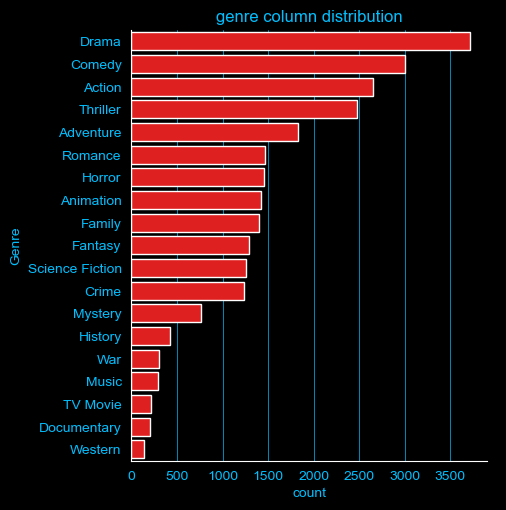

In [31]:
# visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count',
 order = df['Genre'].value_counts().index,
 color = '#ff0000')
plt.title('genre column distribution')
plt.show()

we can notice from the above visual that Drama genre is the most frequent genre
in our dataset and has appeared more than 14% of the times among 19 other
genres

 What movie got the highest popularity ? what's its
genre ?

In [32]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


Which year has the most filmmed movies?

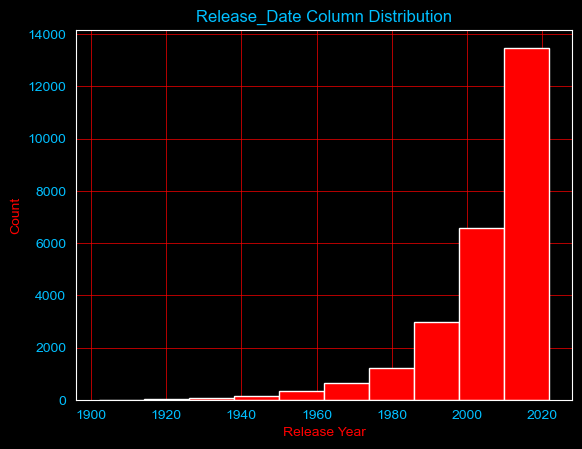

In [39]:
df['Release_Date'].hist(color='red')  # 🔴 Set bar color to red
plt.title('Release_Date Column Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


What genres has highest votes ?


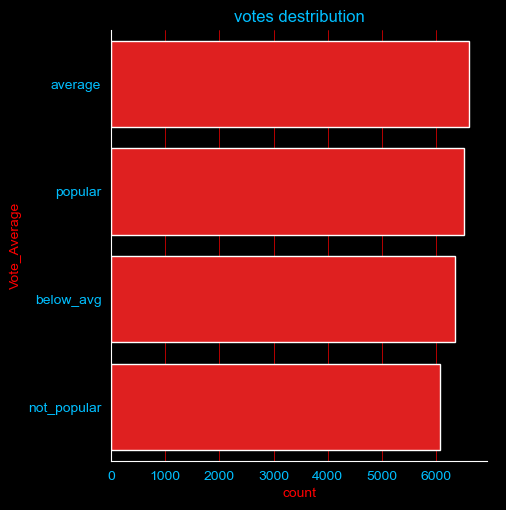

In [38]:
# visualizing vote_average column
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
 order = df['Vote_Average'].value_counts().index,
 color = '#ff0000')
plt.title('votes destribution')
plt.show()

THANK YOU